In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [25]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,19/06/2020,19,6,2020,658,42.0,Afghanistan,AF,AFG,38041757,Asia
1,18/06/2020,18,6,2020,564,13.0,Afghanistan,AF,AFG,38041757,Asia
2,17/06/2020,17,6,2020,783,13.0,Afghanistan,AF,AFG,38041757,Asia
3,16/06/2020,16,6,2020,761,7.0,Afghanistan,AF,AFG,38041757,Asia
4,15/06/2020,15,6,2020,664,20.0,Afghanistan,AF,AFG,38041757,Asia
...,...,...,...,...,...,...,...,...,...,...,...
24133,25/03/2020,25,3,2020,0,0.0,Zimbabwe,ZW,ZWE,14645473,Africa
24134,24/03/2020,24,3,2020,0,1.0,Zimbabwe,ZW,ZWE,14645473,Africa
24135,23/03/2020,23,3,2020,0,0.0,Zimbabwe,ZW,ZWE,14645473,Africa
24136,22/03/2020,22,3,2020,1,0.0,Zimbabwe,ZW,ZWE,14645473,Africa


In [26]:
covid.to_csv('covid_data.csv')

In [27]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)
covid.drop("geoId",axis=1,inplace=True)

In [28]:
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,19/06/2020,658,42.0,Afghanistan,Asia
1,18/06/2020,564,13.0,Afghanistan,Asia
2,17/06/2020,783,13.0,Afghanistan,Asia
3,16/06/2020,761,7.0,Afghanistan,Asia
4,15/06/2020,664,20.0,Afghanistan,Asia
...,...,...,...,...,...
24133,25/03/2020,0,0.0,Zimbabwe,Africa
24134,24/03/2020,0,1.0,Zimbabwe,Africa
24135,23/03/2020,0,0.0,Zimbabwe,Africa
24136,22/03/2020,1,0.0,Zimbabwe,Africa


In [29]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [30]:
covid

,date,cases,deaths,country,continent
0,19/06/2020,658,42.0,Afghanistan,Asia
1,18/06/2020,564,13.0,Afghanistan,Asia
2,17/06/2020,783,13.0,Afghanistan,Asia
3,16/06/2020,761,7.0,Afghanistan,Asia
4,15/06/2020,664,20.0,Afghanistan,Asia
...,...,...,...,...,...
24133,25/03/2020,0,0.0,Zimbabwe,Africa
24134,24/03/2020,0,1.0,Zimbabwe,Africa
24135,23/03/2020,0,0.0,Zimbabwe,Africa
24136,22/03/2020,1,0.0,Zimbabwe,Africa


In [31]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent
24137,21/03/2020,1,0.0,Zimbabwe,Africa
24136,22/03/2020,1,0.0,Zimbabwe,Africa
24135,23/03/2020,0,0.0,Zimbabwe,Africa
24134,24/03/2020,0,1.0,Zimbabwe,Africa
24133,25/03/2020,0,0.0,Zimbabwe,Africa
...,...,...,...,...,...
4,15/06/2020,664,20.0,Afghanistan,Asia
3,16/06/2020,761,7.0,Afghanistan,Asia
2,17/06/2020,783,13.0,Afghanistan,Asia
1,18/06/2020,564,13.0,Afghanistan,Asia


In [32]:
covid1.head()

,date,cases,deaths,country,continent
24137,21/03/2020,1,0.0,Zimbabwe,Africa
24136,22/03/2020,1,0.0,Zimbabwe,Africa
24135,23/03/2020,0,0.0,Zimbabwe,Africa
24134,24/03/2020,0,1.0,Zimbabwe,Africa
24133,25/03/2020,0,0.0,Zimbabwe,Africa


In [33]:
India = covid1[covid1["country"]=="India"]
India

,date,cases,deaths,country,continent
10542,31/12/2019,0,0.0,India,Asia
10541,01/01/2020,0,0.0,India,Asia
10540,02/01/2020,0,0.0,India,Asia
10539,03/01/2020,0,0.0,India,Asia
10538,04/01/2020,0,0.0,India,Asia
...,...,...,...,...,...
10376,15/06/2020,11502,325.0,India,Asia
10375,16/06/2020,10667,380.0,India,Asia
10374,17/06/2020,10974,2003.0,India,Asia
10373,18/06/2020,12881,334.0,India,Asia


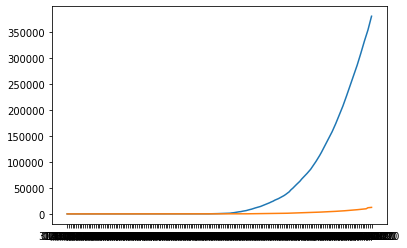

In [34]:
plt.plot(India["date"],India["cases"].cumsum())
plt.plot(India["date"],India["deaths"].cumsum())

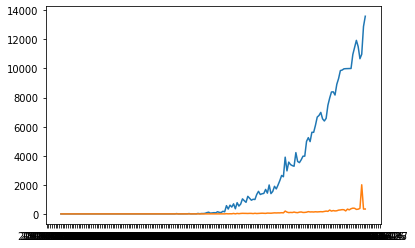

In [35]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"]
z_values = India["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)

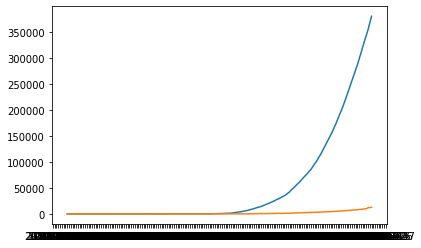

In [36]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"].cumsum()
z_values = India["deaths"].cumsum()
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)

In [37]:
India

,date,cases,deaths,country,continent
10542,31/12/2019,0,0.0,India,Asia
10541,01/01/2020,0,0.0,India,Asia
10540,02/01/2020,0,0.0,India,Asia
10539,03/01/2020,0,0.0,India,Asia
10538,04/01/2020,0,0.0,India,Asia
...,...,...,...,...,...
10376,15/06/2020,11502,325.0,India,Asia
10375,16/06/2020,10667,380.0,India,Asia
10374,17/06/2020,10974,2003.0,India,Asia
10373,18/06/2020,12881,334.0,India,Asia


In [38]:
India.to_csv("India_covid.csv", index=False)

In [39]:
India_covid = pd.read_csv("India_covid.csv")
India_covid

,date,cases,deaths,country,continent
0,31/12/2019,0,0.0,India,Asia
1,01/01/2020,0,0.0,India,Asia
2,02/01/2020,0,0.0,India,Asia
3,03/01/2020,0,0.0,India,Asia
4,04/01/2020,0,0.0,India,Asia
...,...,...,...,...,...
166,15/06/2020,11502,325.0,India,Asia
167,16/06/2020,10667,380.0,India,Asia
168,17/06/2020,10974,2003.0,India,Asia
169,18/06/2020,12881,334.0,India,Asia


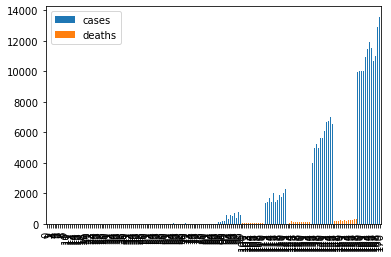

In [40]:
India_covid.plot.bar()

In [41]:
India_covid.drop("country",axis=1,inplace=True)
India_covid.drop("continent",axis=1,inplace=True)
India_covid

,date,cases,deaths
0,31/12/2019,0,0.0
1,01/01/2020,0,0.0
2,02/01/2020,0,0.0
3,03/01/2020,0,0.0
4,04/01/2020,0,0.0
...,...,...,...
166,15/06/2020,11502,325.0
167,16/06/2020,10667,380.0
168,17/06/2020,10974,2003.0
169,18/06/2020,12881,334.0


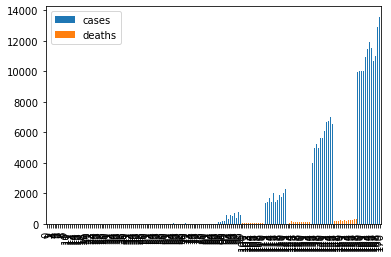

In [42]:
India_covid.plot.bar()

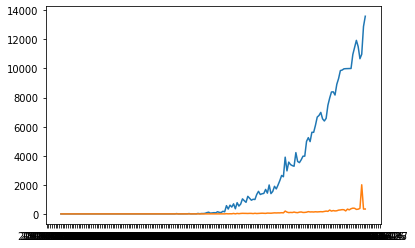

In [43]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)

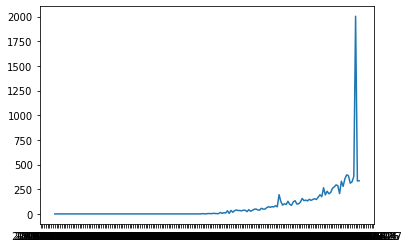

In [44]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
#y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
#plt.plot(x_values, y_values)
plt.plot(x_values, z_values)